In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.spatial.distance import euclidean
from scipy.optimize import root_scalar
from scipy.optimize import fsolve



<h1> Gráfico da Curva 6 </h1>

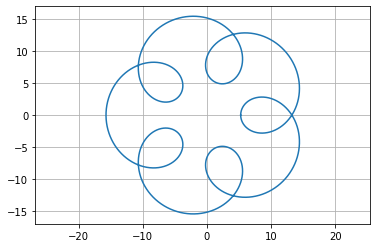

In [136]:
def curva6(t):
    x = (21/2)*np.cos(t) - (21/4)*np.cos(6*t)
    y = (21/2)*np.sin(t) - (21/4)*np.sin(6*t)
    return x, y

t = np.linspace(0, 2*np.pi, int(1e7), endpoint=False)
x, y = curva6(t)

plt.axis('equal')
plt.plot(x, y)
plt.grid()
plt.savefig("curva", dpi=180)
plt.show()    

<h2>Pontos de autointersecao</h2>

In [146]:
funcoes = [
    lambda B : (-21/2)*np.sin(B/2)+(-21/4)*np.sin(3*B),
    lambda B : 8.495*np.sin(B/2)+4.247*np.sin(3*B),
    lambda B : 3.245*np.sin(B/2)-1.622*np.sin(3*B),
    lambda B : -3.245*np.sin(B/2)-1.622*np.sin(3*B),
    lambda B : -8.495*np.sin(B/2)+4.247*np.sin(3*B),
]

lista_u = []
lista_v = []
delta = 1e-6
lista_bs = []
for f in funcoes:
    B = np.arange(-(2*np.pi),0+delta,delta)
    bs = np.take(B,np.where(abs(f(B)) < 1e-4)[0])
    bs_set = set()
    for b in bs:
        round_b = round(b,3)
        if round_b > -6.283 and round_b<0:
            bs_set.add(round_b)
    lista_bs.append(bs_set)
k_s = [2*np.pi, (2*np.pi)/5, (4*np.pi)/5, (6*np.pi)/5, (8*np.pi)/5] 
Us = set()
Vs =  set()
for bs,k in zip(lista_bs,k_s):
    for b in bs:
        u = (b+k)/2
        v = u-b

        Us.add(round(u,3))
        Vs.add(round(v,3))
print(Us)
print(Vs)


{0.383, 0.874, 2.13, -0.874, -2.13}
{1.64, 2.896, 3.387, 4.643, 5.9}


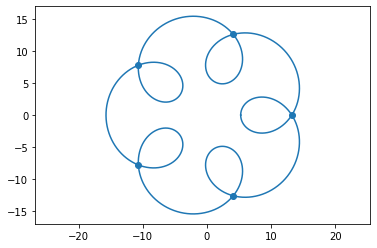

4.643

In [145]:
px,py = curva6(np.array(list(Vs)))
plt.axis('equal')

plt.plot(x,y)
plt.scatter(px,py)
plt.show()
list(Vs)[3]

<h2>Pontos em que a reta tangente é vertical</h2>

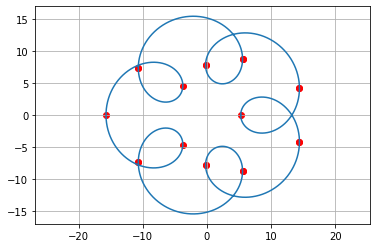

In [139]:
def curv_linha(t):
    x_linha = (63/2)*np.sin(6*t) - (21/2)*np.sin (t) 
    y_linha = (21/2)*np.cos(t) - (63/2)*np.cos(6*t)
    return x_linha, y_linha
x_linha, y_linha = curv_linha(t)

idx = np.where((abs(x_linha) < 1e-4) & (abs(y_linha) > 1e-4))
ts = set(np.round(np.take(t, idx[0]), 3))
plt.axis('equal')
plt.plot(x, y)
plt.scatter(px:=np.take(x, idx[0]), py:=np.take(y, idx[0]), color='r')
plt.grid()
plt.savefig("pontos_verticais",dpi=160)
plt.show()
# print([zip(px,py)





<h2>Pontos em que a reta tangente é horizontal</h2>

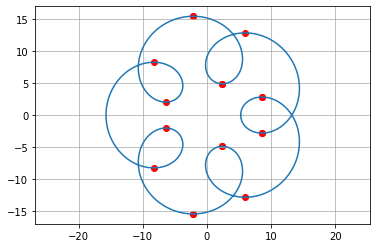

In [140]:
idxh = np.where((abs(x_linha) > 1e-4) & (abs(y_linha) < 1e-4))
tsh = set(np.round(np.take(t, idx[0]), 3))
plt.axis('equal')
plt.plot(x, y)
plt.scatter(np.take(x, idxh[0]), np.take(y, idxh[0]), color='r')
plt.grid()
plt.savefig("pontos_horizontais",dpi=160)
plt.show()

<h2>Comprimento da curva</h2>

<h3>Aproximação pela poligonal</h3>

In [141]:

pontos = list(zip(*curva6(np.linspace(0,2*np.pi, 1000, endpoint=False))))
sum(map(euclidean, pontos[:-1], pontos[1:]))

203.31405932596917

<h3>Comprimento pela integral</h3>

In [142]:
def g(t):
    return np.sqrt(sum(np.array(curv_linha(t))**2))
#Soma de Riemann
dt = t[1] - t[0]
I1 = 0
for i in g(t):
    I1 += i*dt
I2 = integrate.quad(g,0,2*np.pi)

print(f"Resultado da Soma de Riemman: {I1} \nResultado SciPy Integrate: {I2[0]}")

Resultado da Soma de Riemman: 203.4574126315379 
Resultado SciPy Integrate: 203.45741263150927
